# Exploring Mushrooms

When asked to think of a mushroom, you might imagine the following:

![this shows a photo of some generic button mushrooms in a forest.](https://static-assets.codecademy.com/Paths/data-analyst-career-path/mushroom-analysis-project/generic_mushroom.jpg)

It's a beige, convex mushroom top with a uniform, thick stem. Maybe you thought of it cut up on a slice of delicious pizza or braised with sauce over rice. Regardless, you most likely did not consider this:

![A photo of some beautiful mushrooms in a forest. They do not have the signature "mushroom top" and have visually appealing grooves that make them look almost like floral.](https://static-assets.codecademy.com/Paths/data-analyst-career-path/mushroom-analysis-project/pretty_mushroom.jpg)

Mushrooms exist in a variety of different colors, shapes, sizes, textures, etc. In this project, you will analyze an extensive mushroom dataset from [UCI](https://archive.ics.uci.edu/ml/datasets/Mushroom) using bar charts and acquaint yourself with the diverse array of mushrooms that exist worldwide.

## Overview

I’ve been working with the mushroom_data.csv file, which includes data on various mushroom characteristics across 23 columns. To get a better understanding of the data, I reviewed the table to identify the types of variables it contains and how we might visualize them effectively.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load in the data
df = pd.read_csv("mushroom_data.csv")
print(df.head())

       Class Cap Shape Cap Surface Cap Color  Bruises     Odor  \
0  Poisonous    Convex      Smooth     Brown     True  Pungent   
1     Edible    Convex      Smooth    Yellow     True   Almond   
2     Edible      Bell      Smooth     White     True    Anise   
3  Poisonous    Convex       Scaly     White     True  Pungent   
4     Edible    Convex      Smooth      Gray    False      NaN   

  Gill Attachment Gill Spacing Gill Size Gill Color  ...  \
0            Free        Close    Narrow      Black  ...   
1            Free        Close     Broad      Black  ...   
2            Free        Close     Broad      Brown  ...   
3            Free        Close    Narrow      Brown  ...   
4            Free      Crowded     Broad      Black  ...   

  Stalk Surface Below Ring Stalk Color Above Ring Stalk Color Below Ring  \
0                   Smooth                  White                  White   
1                   Smooth                  White                  White   
2             

2. In our dataset, which has 23 variables, one column, Bruises, contains boolean values (True or False). These boolean values need to be converted to strings to avoid issues when plotting this column.                          To address this:

Convert Boolean Values to Strings: We’ll iterate through the Bruises column and convert each True or False value to a string using the str() method.

Ensure All Variables are Object Types: After conversion, all variables will be of object type, making them suitable for graphing.

Automate Plotting: Instead of manually plotting each variable, we’ll use loops to make this process more efficient.

To verify our setup, we’ll use the columns attribute to get the names of each variable in the dataset. We’ll create a loop to print each column name to ensure the loop is working correctly.

In [33]:
# list of all column headers
for i in range(0,len(df['Bruises'])):
    df['Bruises'][i] = str(df['Bruises'][i])
columns = df.columns.tolist()

for column in columns:
    print(column)

Class
Cap Shape
Cap Surface
Cap Color
Bruises
Odor
Gill Attachment
Gill Spacing
Gill Size
Gill Color
Stalk Shape
Stalk Root
Stalk Surface Above Ring
Stalk Surface Below Ring
Stalk Color Above Ring
Stalk Color Below Ring
Veil Type
Veil Color
Ring Number
Ring Type
Spore Print Color
Population
Habitat


3. I'll plot the data using seaborn's .countplot() method. I'll include this in the for loop, using column and the df DataFrame to graph the value counts for each variable in mushroom_data.csv. I'll hold off on using plt.show() until the next task.

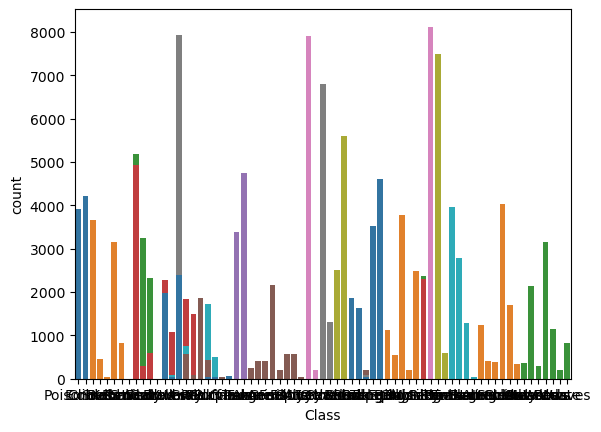

In [9]:
for column in columns:
    sns.countplot(x=column, data=df)
    

4. At the end of the for loop, I'll use plt.show() to display the plots and plt.clf() to clear the figure. This will prevent overlapping and keep the plots neatly stacked.

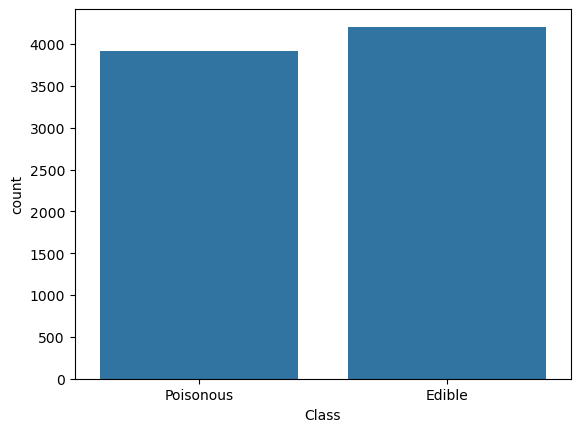

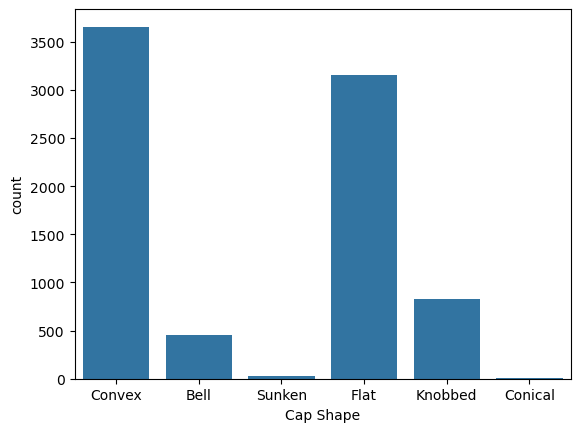

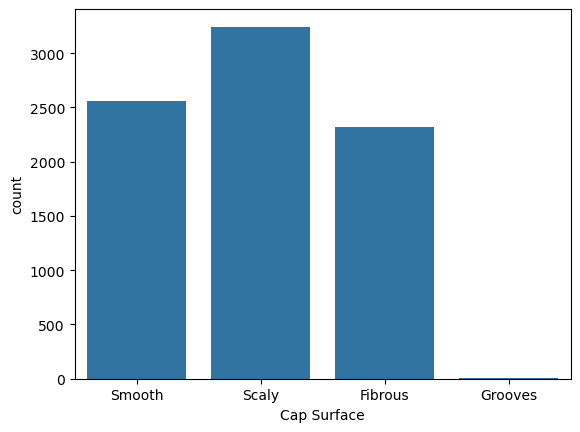

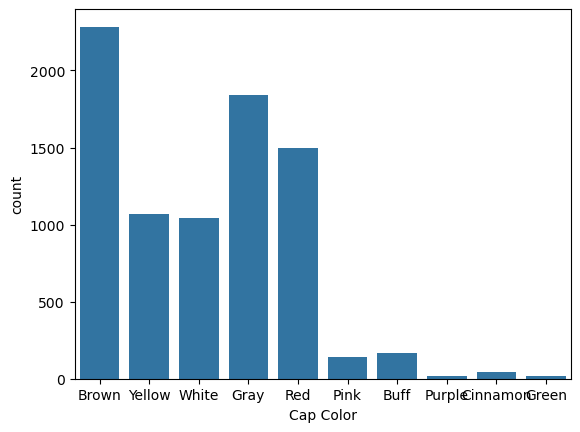

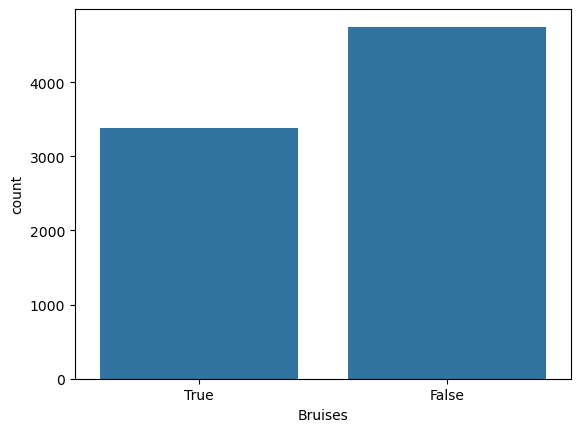

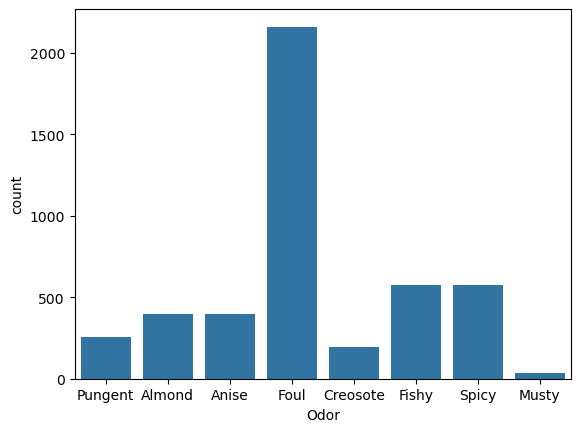

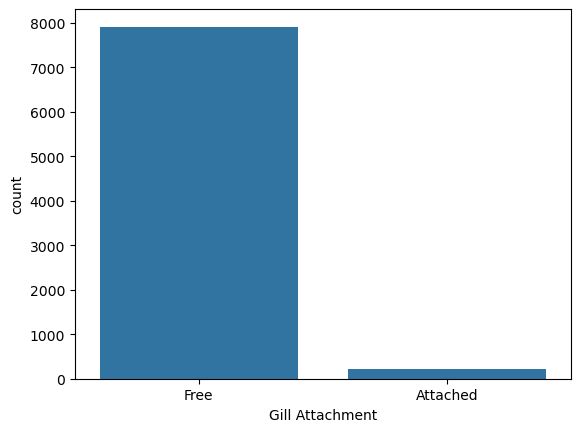

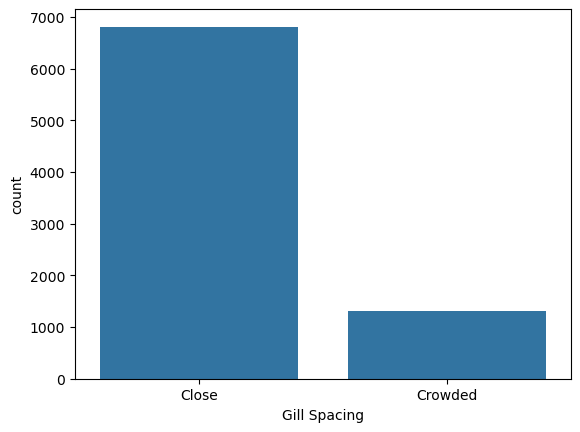

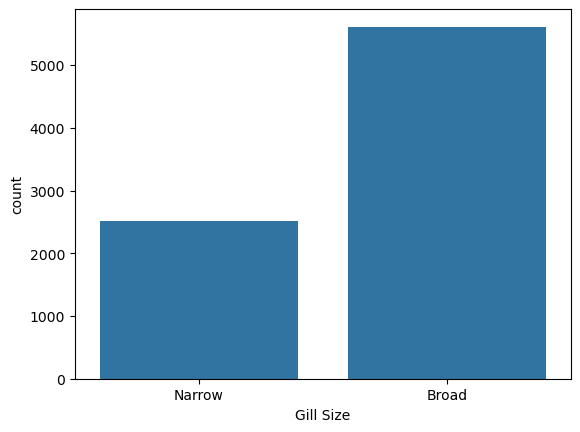

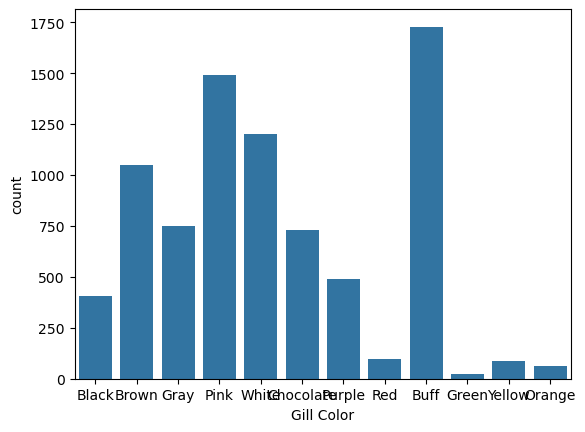

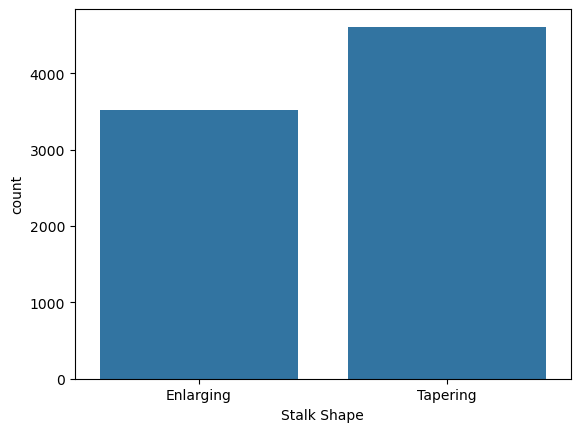

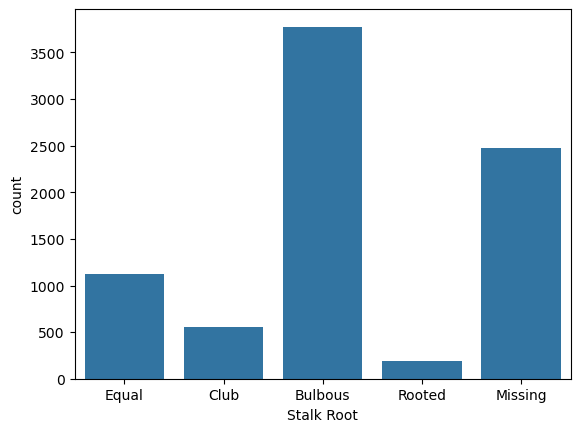

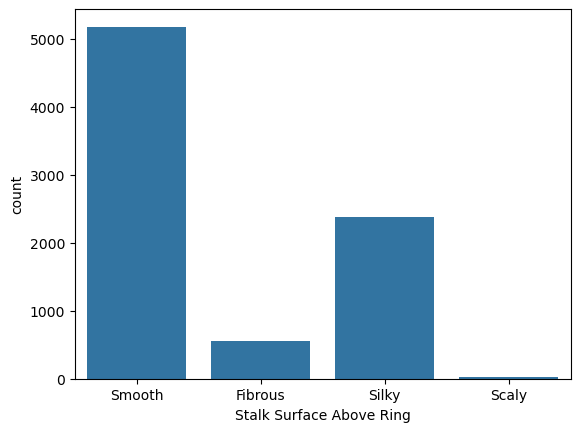

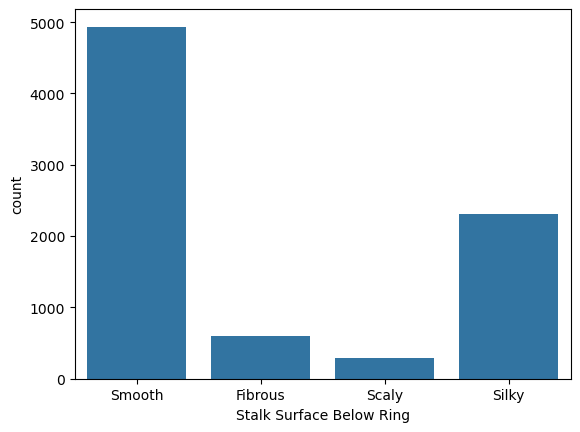

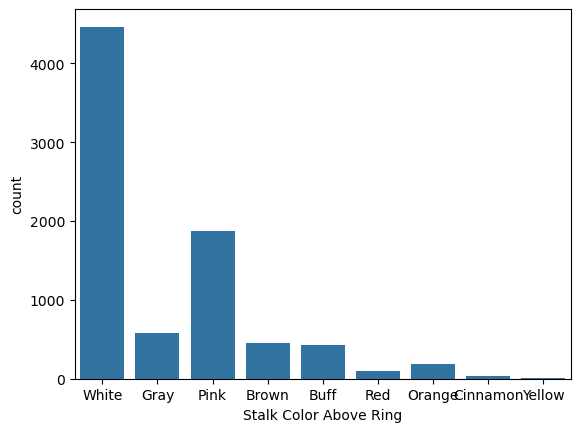

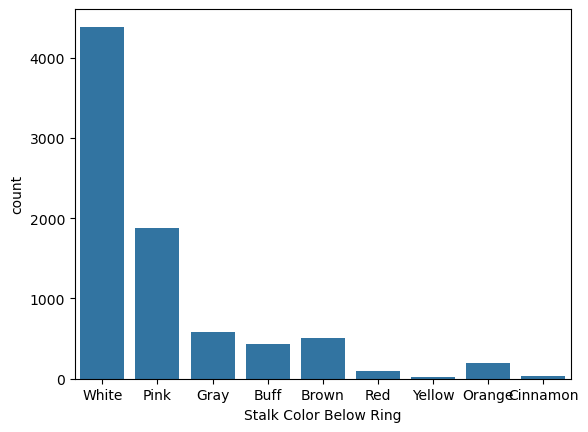

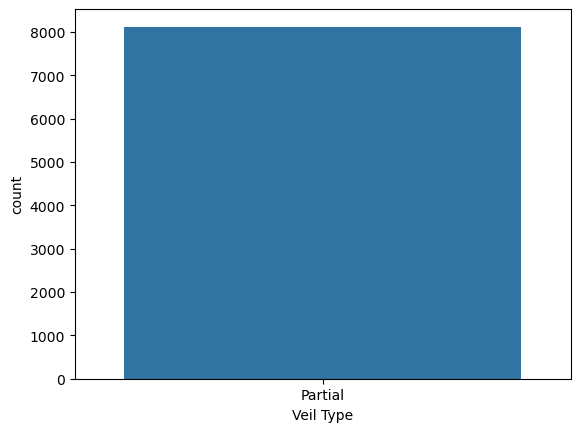

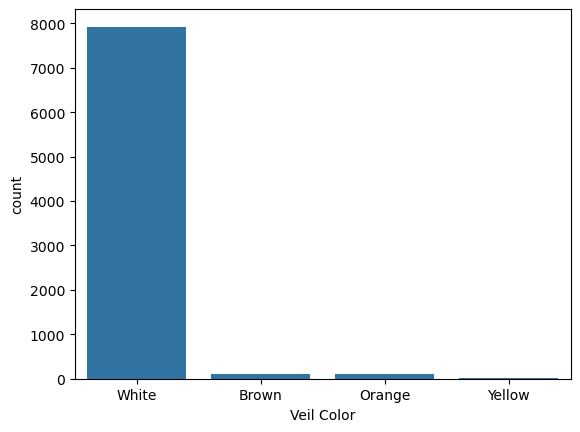

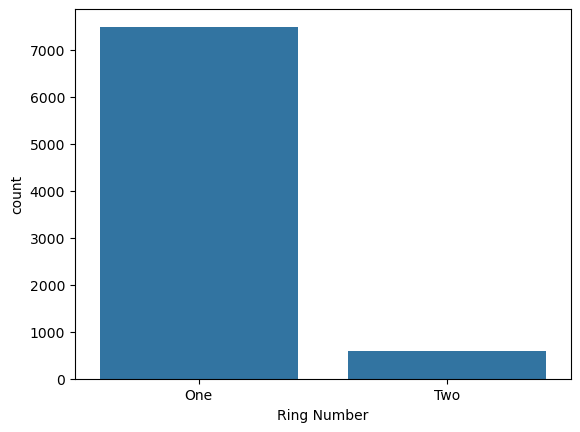

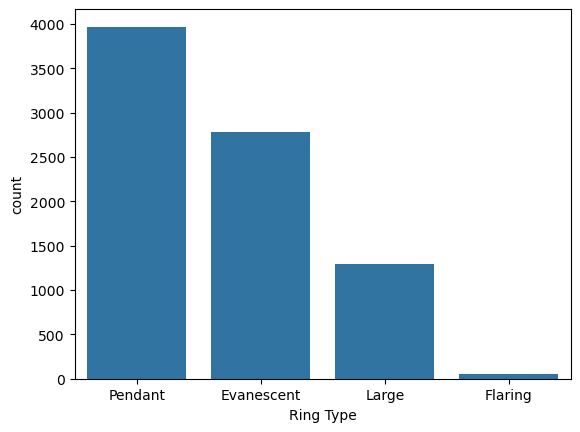

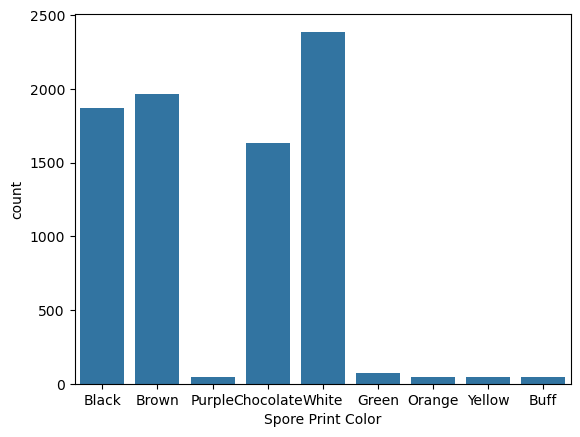

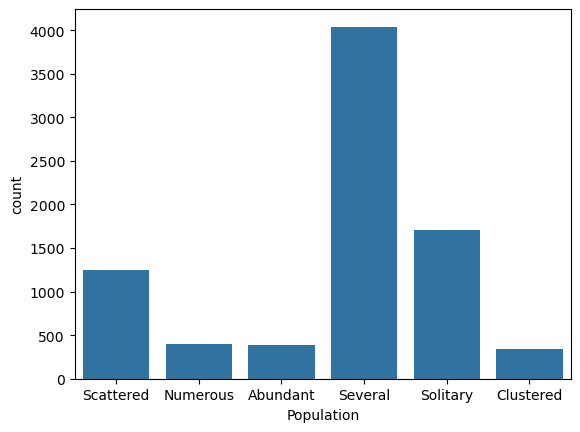

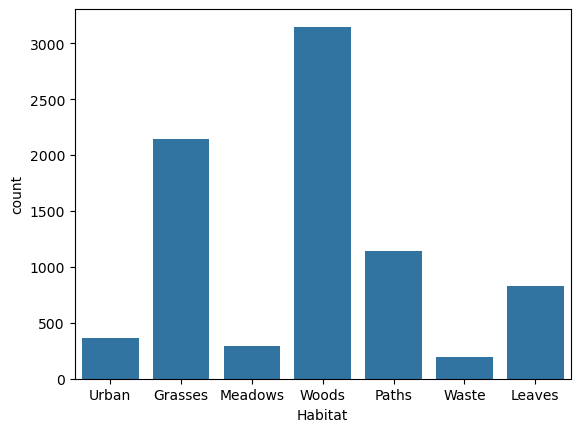

<Figure size 640x480 with 0 Axes>

In [11]:
for column in columns:
    sns.countplot(x=column, data=df)
    plt.show()
    plt.clf()

5. After using plt.show() and plt.clf(), I'll review the 23 plots that appear. I'll look for trends, such as which variables have a clear mode and which are diverse. I'll also identify the most common habitat for mushrooms and note any new questions that come up from the graphs. Next, I'll focus on cleaning up the graphs to make them more readable and useful for spotting patterns.

6. As I review the graphs, I'll fix some imperfections like overlapping x-axis labels and small font size. To address this, I'll add two lines of code after the .countplot() method in the for loop. The first line will rotate the x-axis labels slightly and increase the font size. The second line will increase the font size of the variable labels for better readability.

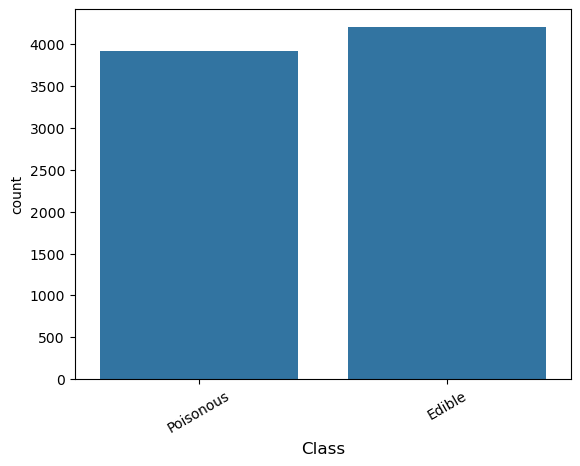

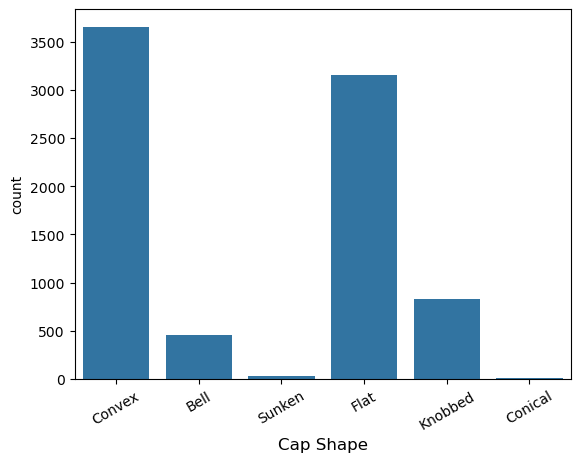

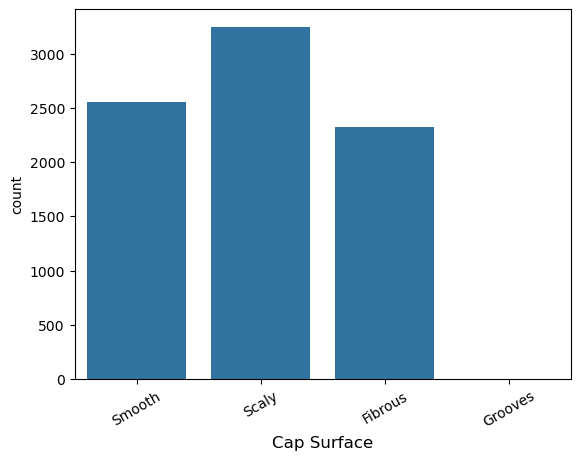

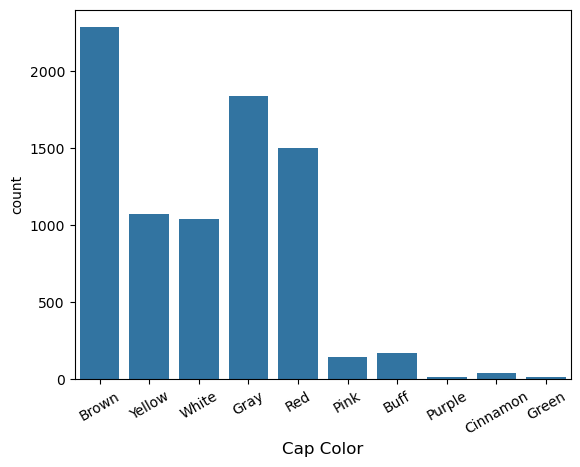

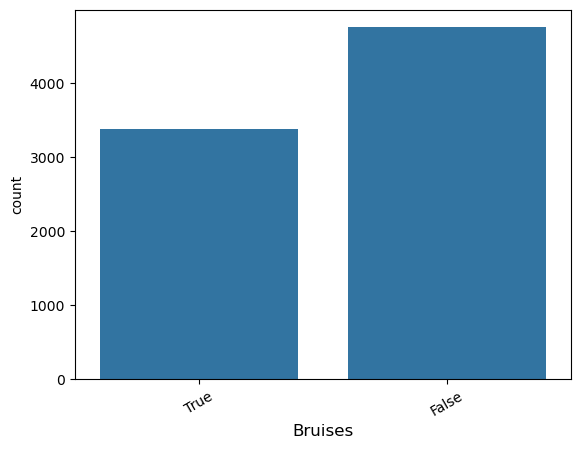

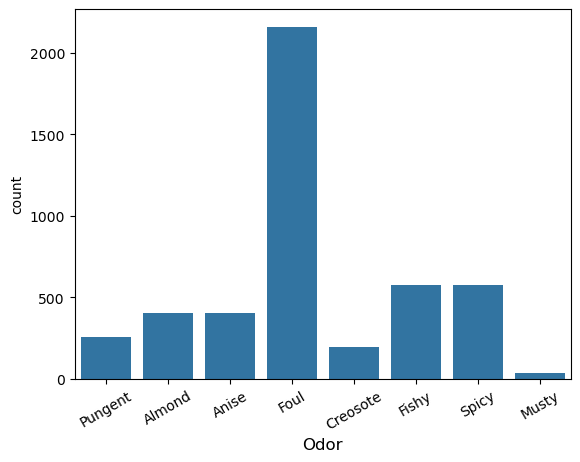

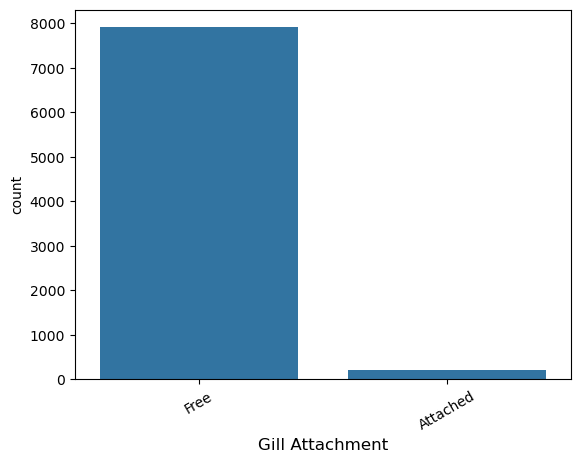

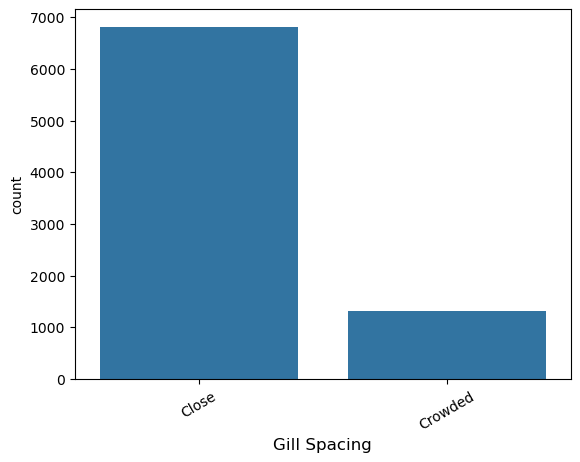

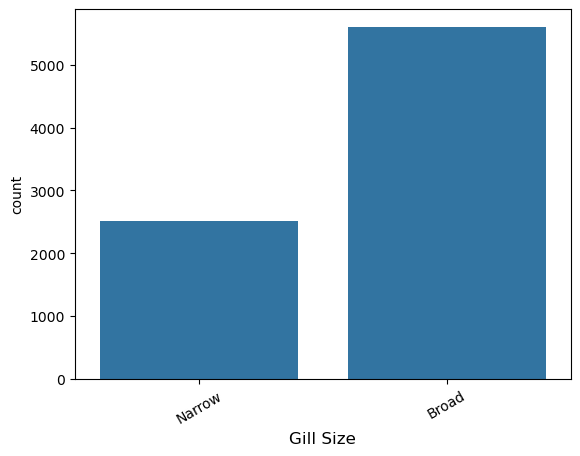

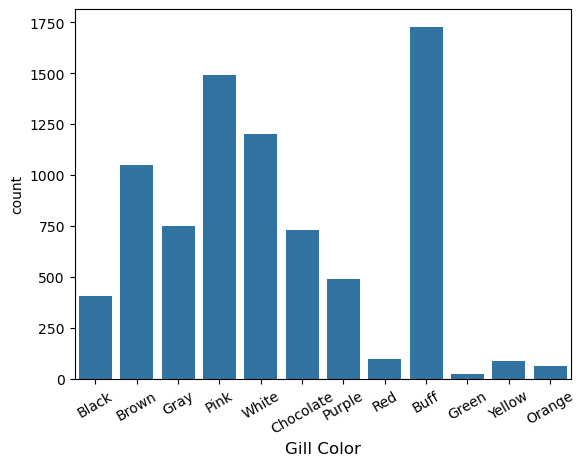

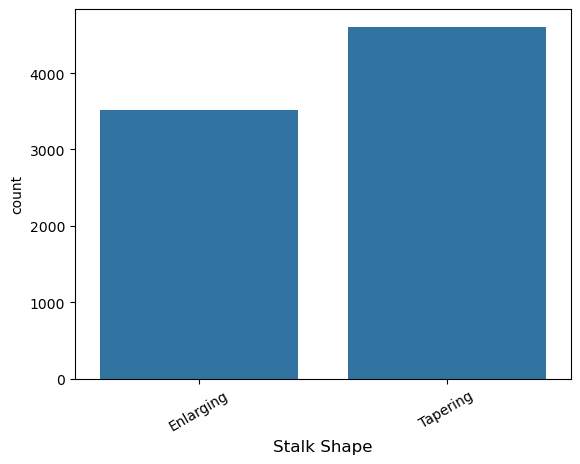

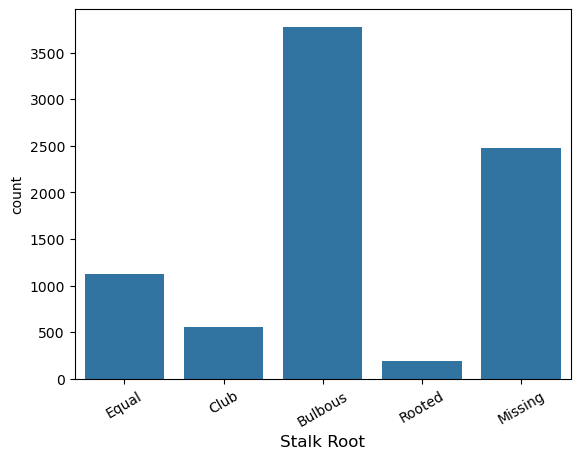

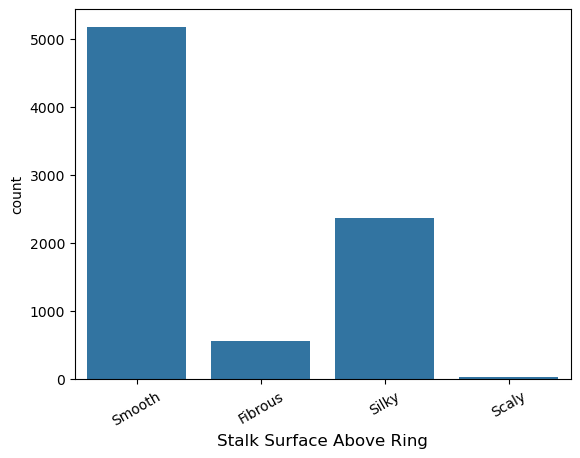

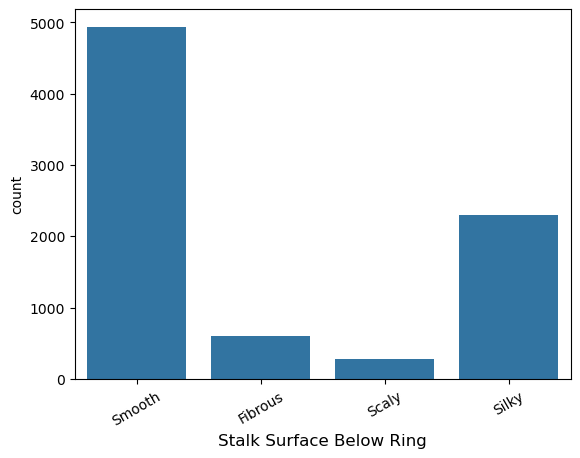

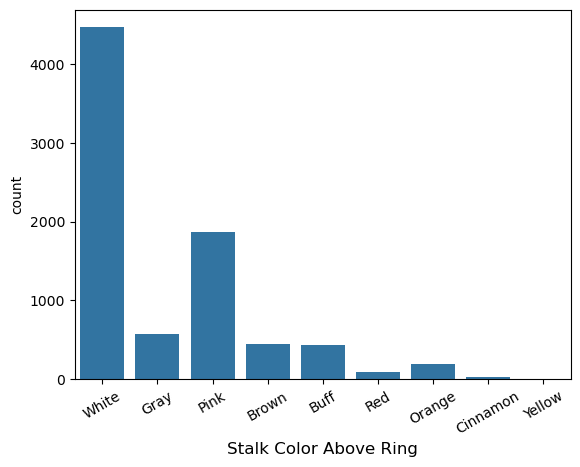

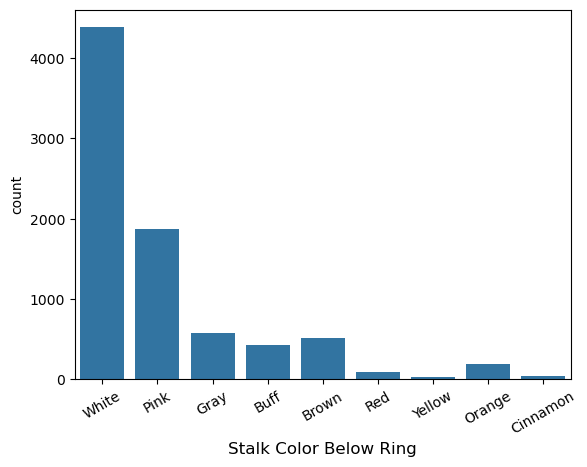

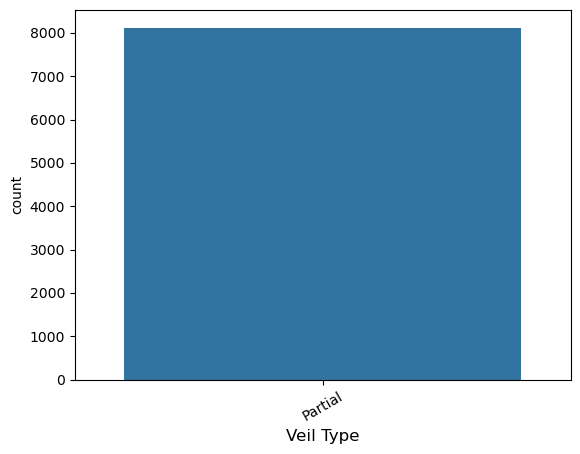

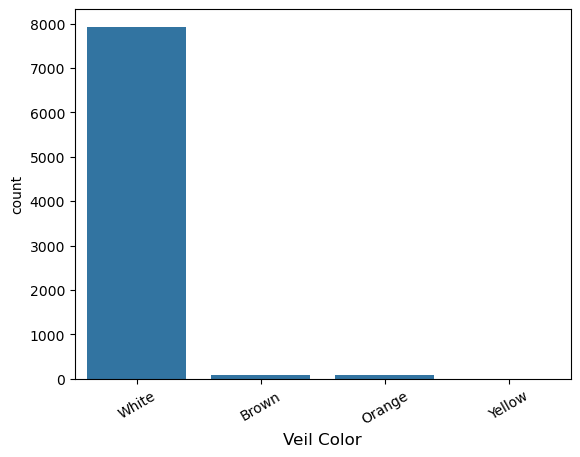

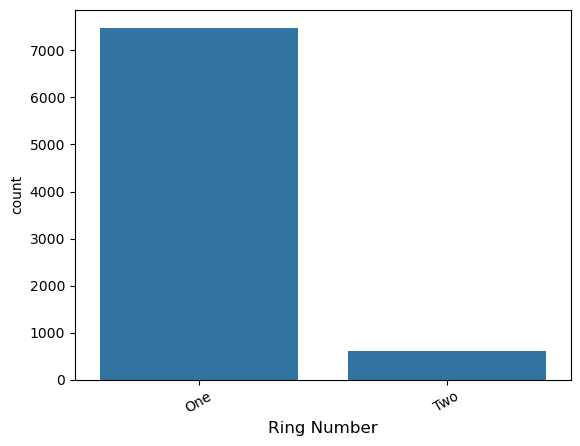

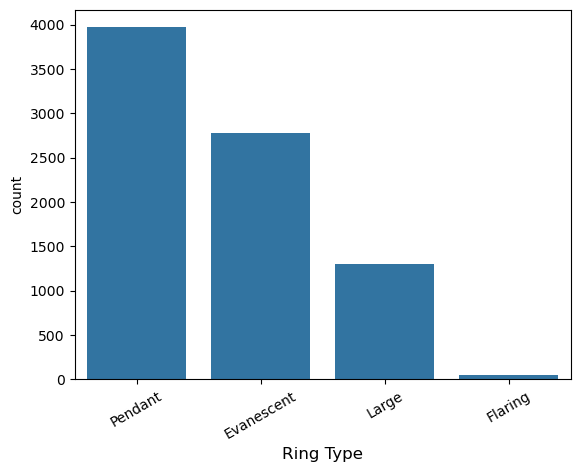

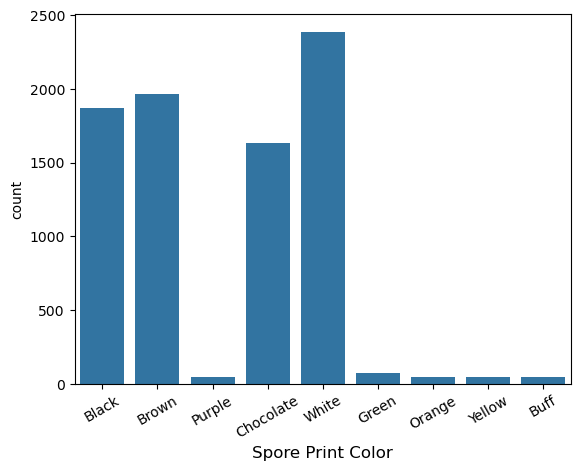

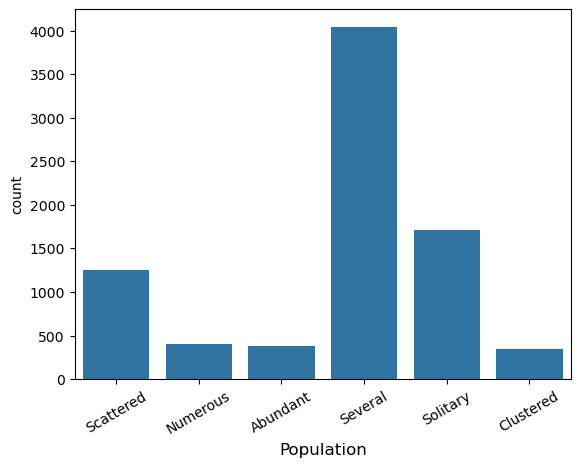

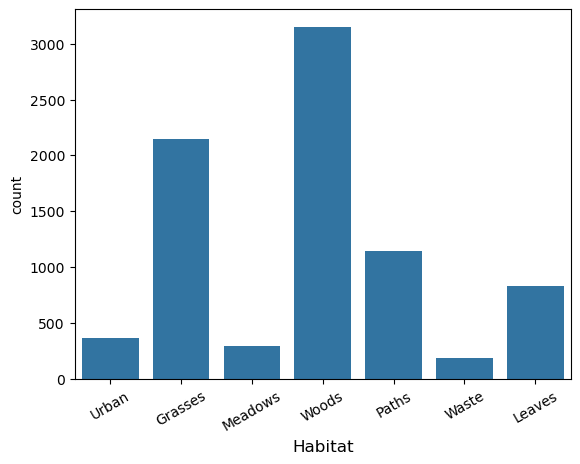

<Figure size 640x480 with 0 Axes>

In [15]:
for column in columns:
    # print(column)
    sns.countplot(x = df[column], data=df)
    # rotates the value labels slightly so they don't overlap, also slightly increases font size
    plt.xticks(rotation=30, fontsize=10)
    # increases the variable label font size slightly to increase readability
    plt.xlabel(column, fontsize=12)
    plt.show()
    plt.clf()

7. To further enhance readability, I'll add an informative title to each graph. I'll use the .title() method from Matplotlib to set the title as "{Variable Name} Value Counts," with column capturing each column name. I'll include this line after the .countplot() method in the for loop.

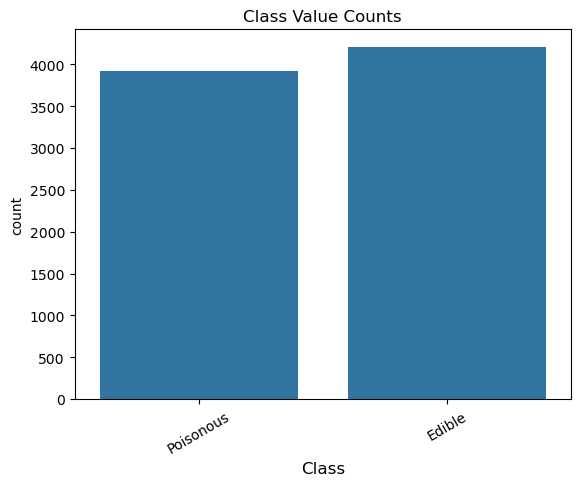

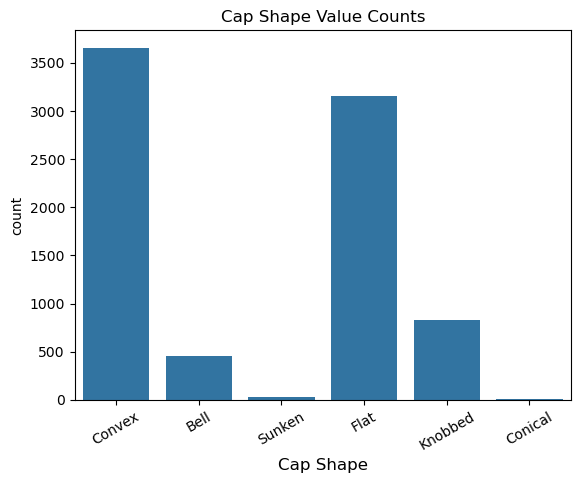

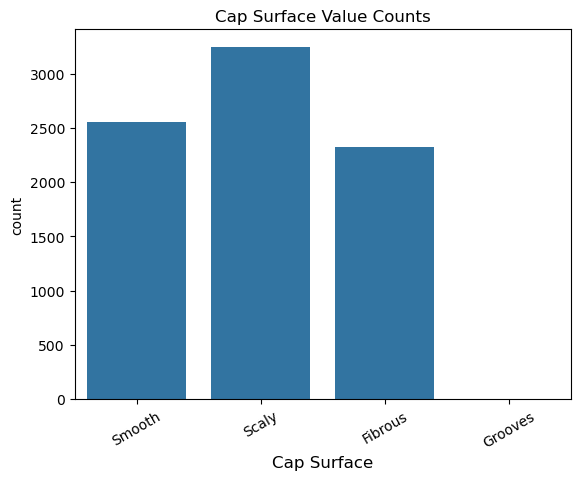

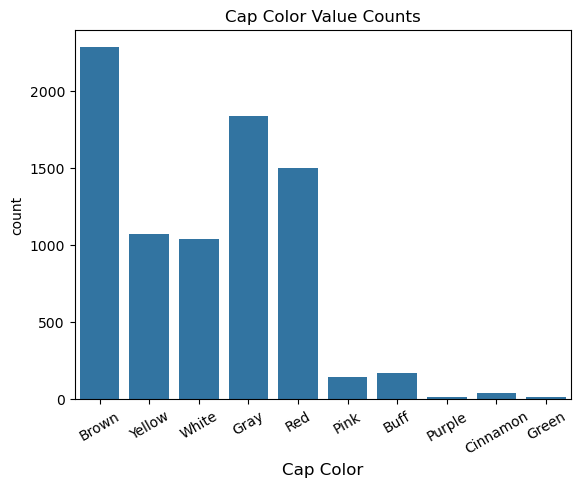

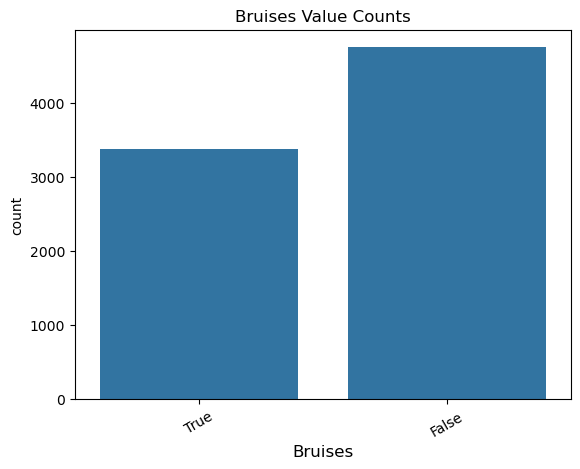

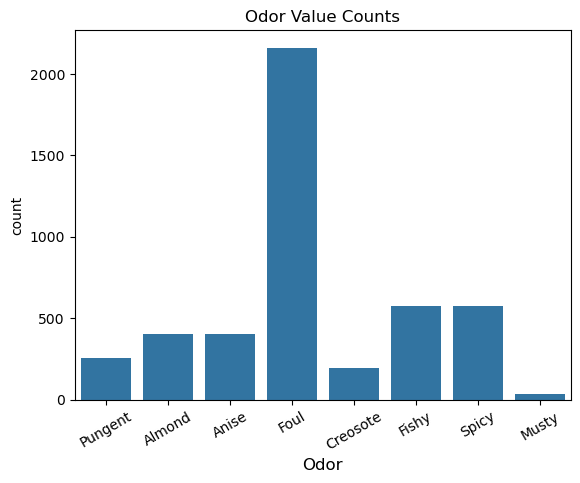

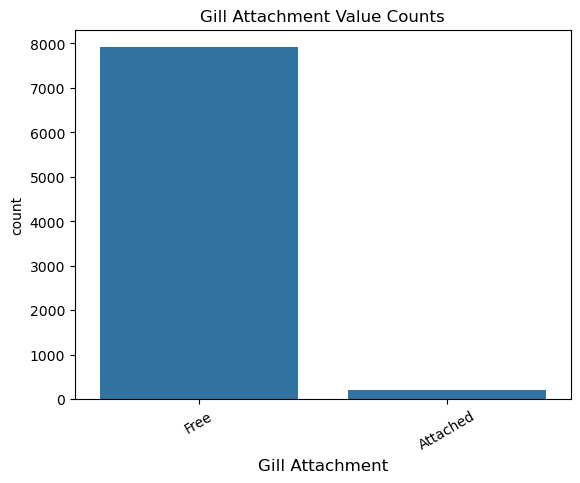

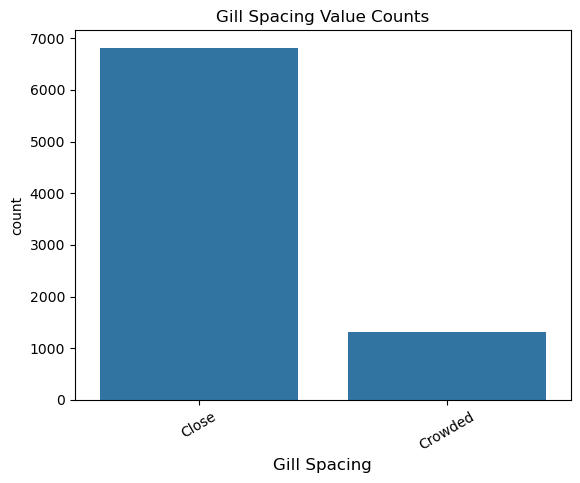

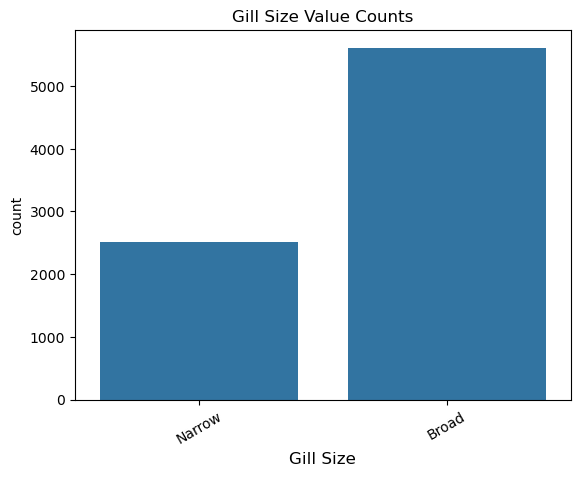

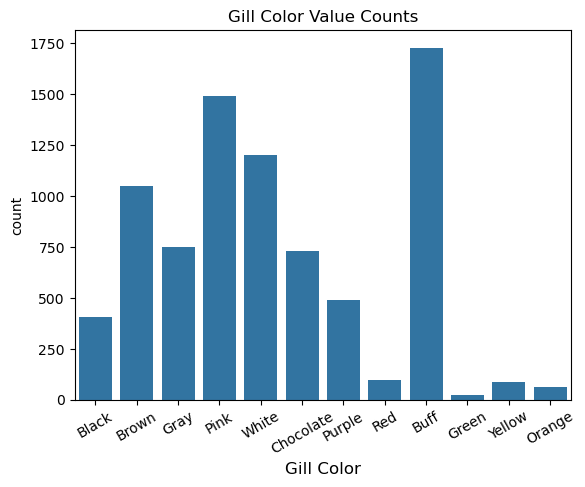

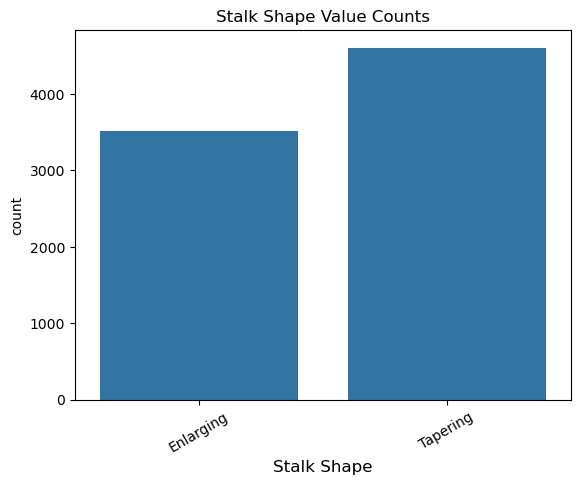

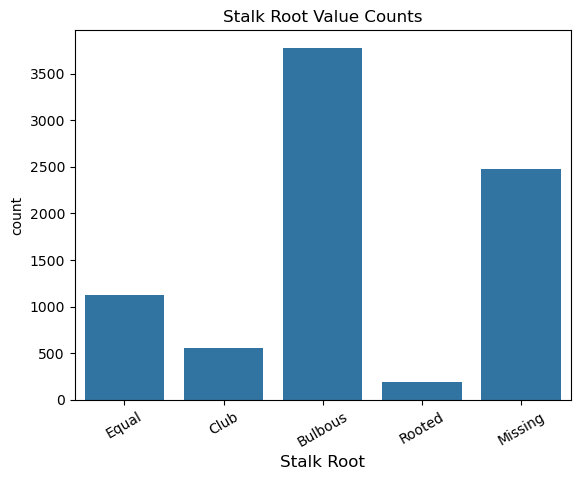

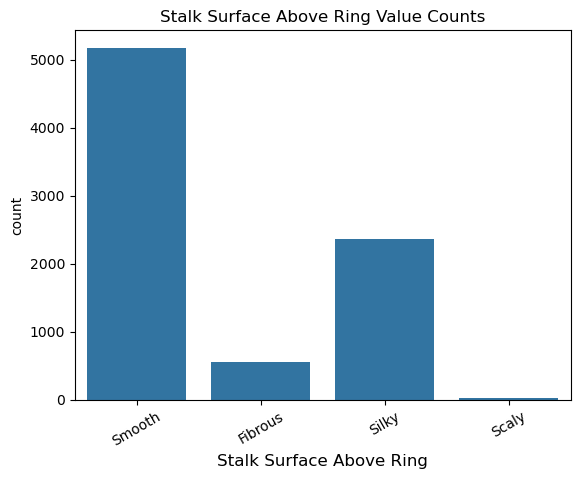

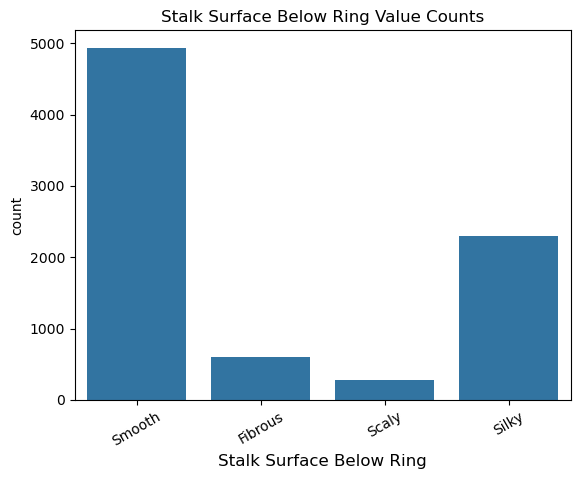

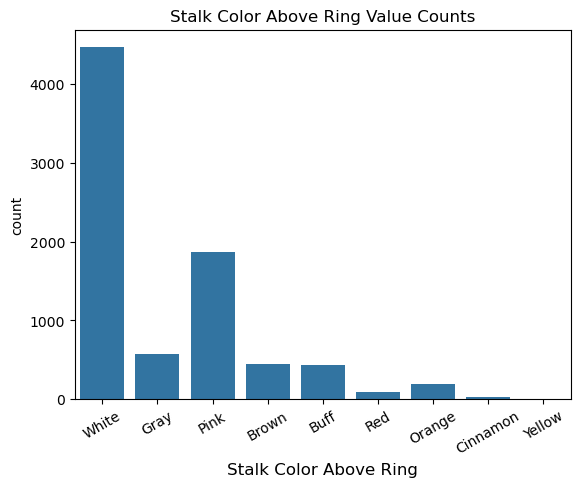

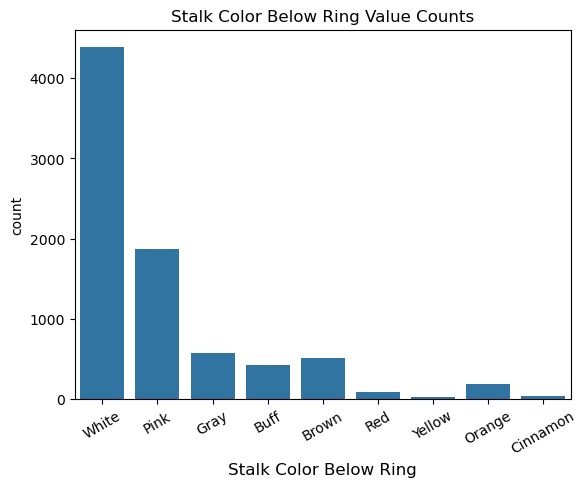

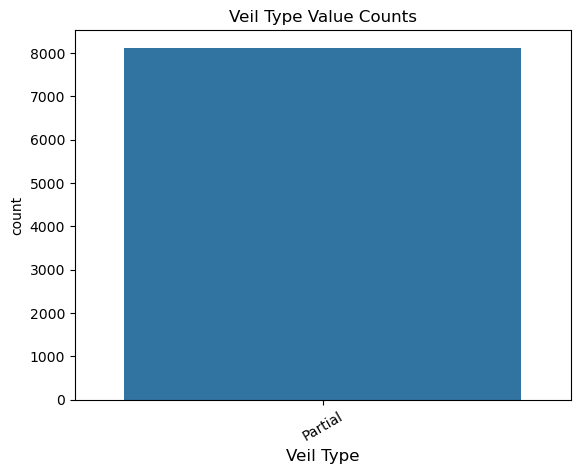

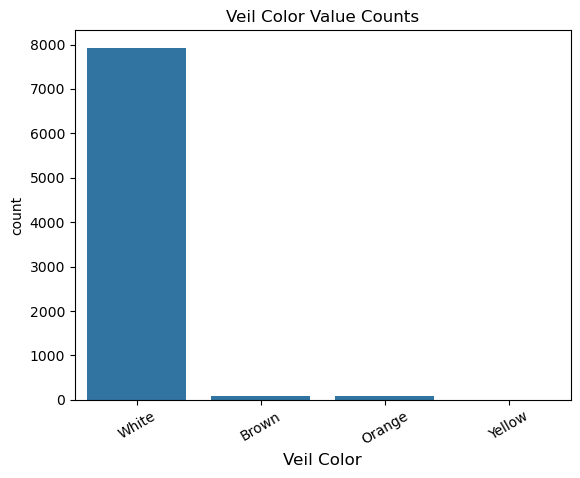

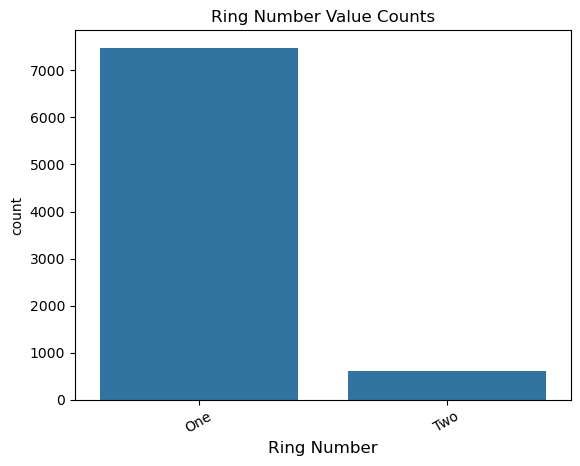

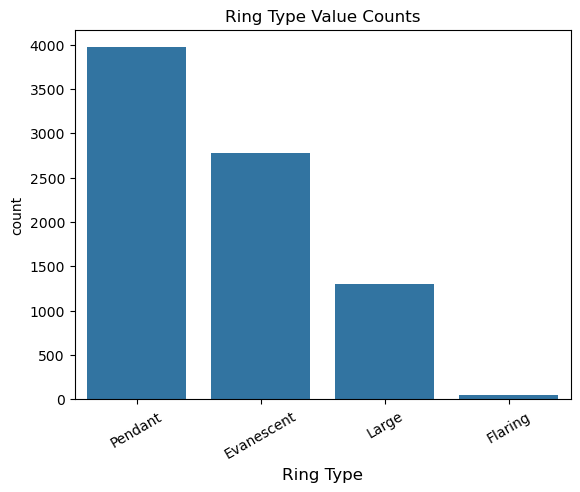

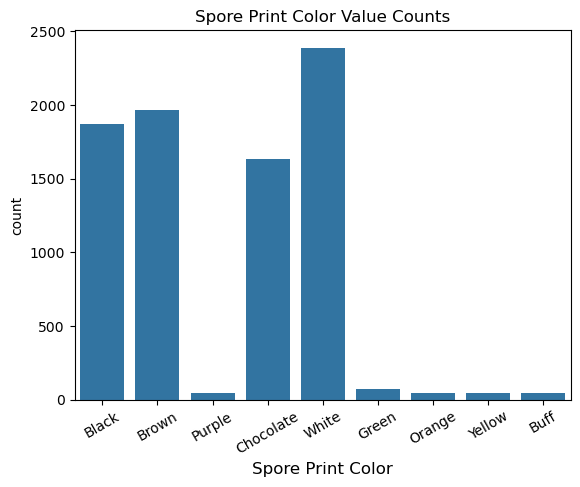

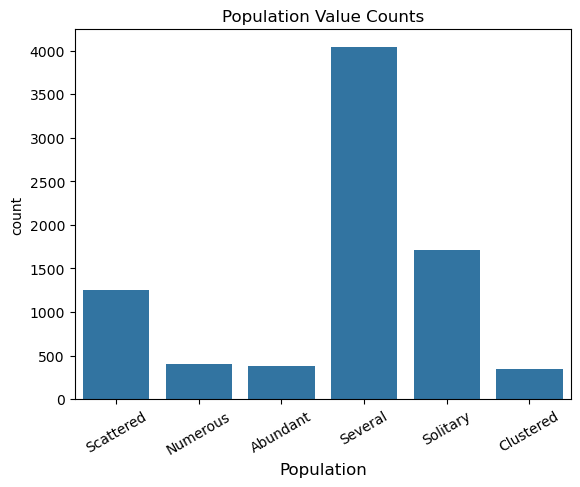

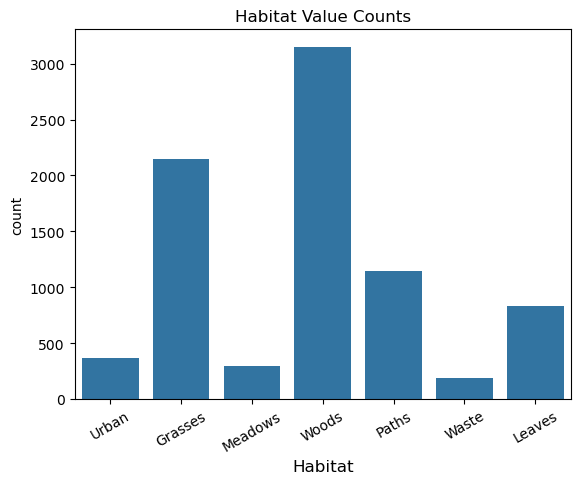

<Figure size 640x480 with 0 Axes>

In [17]:
for column in columns:
    # print(column)
    sns.countplot(x = df[column], data=df)
    # rotates the value labels slightly so they don't overlap, also slightly increases font size
    plt.xticks(rotation=30, fontsize=10)
    # increases the variable label font size slightly to increase readability
    plt.xlabel(column, fontsize=12)
    plt.title(column + ' Value Counts')
    plt.show()
    plt.clf()

8. To improve readability further, I'll add the order parameter to the .countplot() method to sort the value counts in descending order. I'll use the .value_counts() method and .index object from pandas to achieve this.

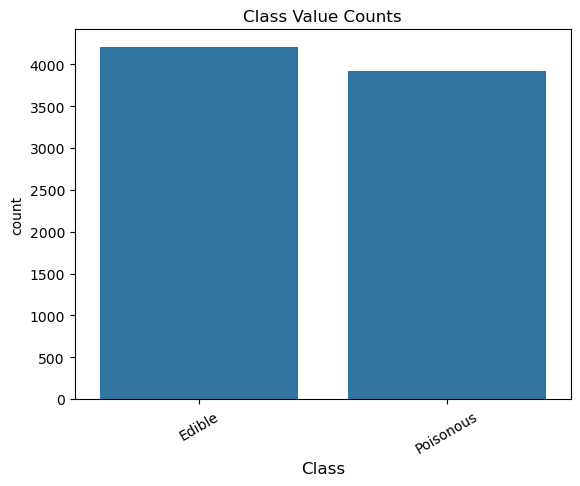

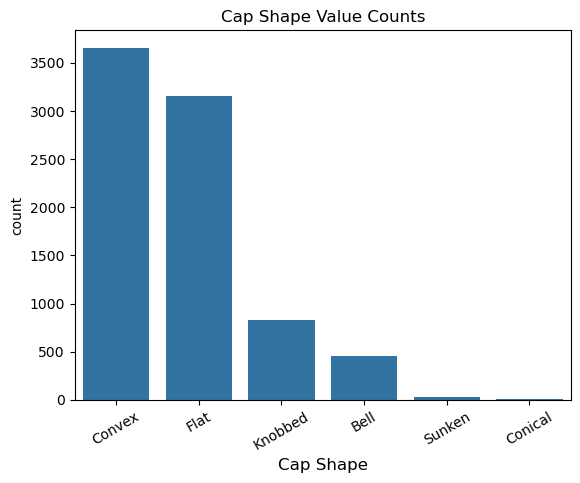

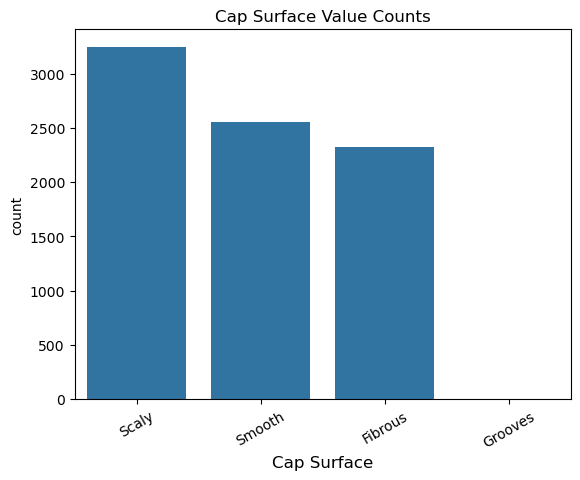

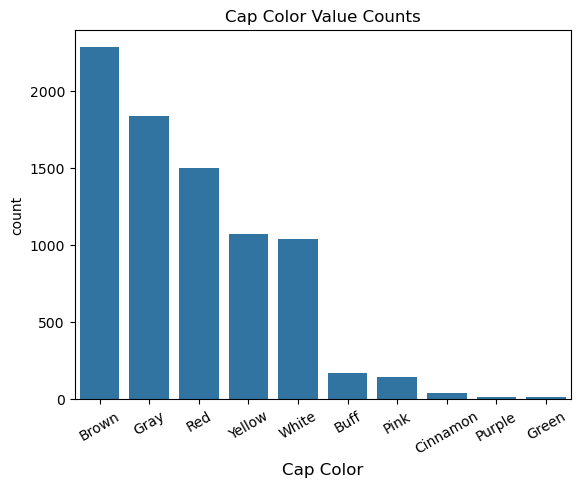

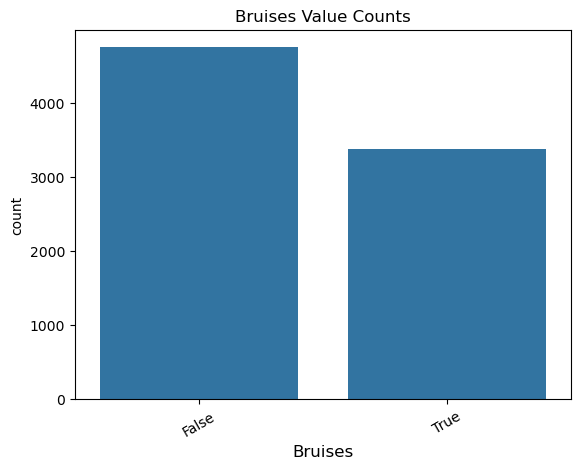

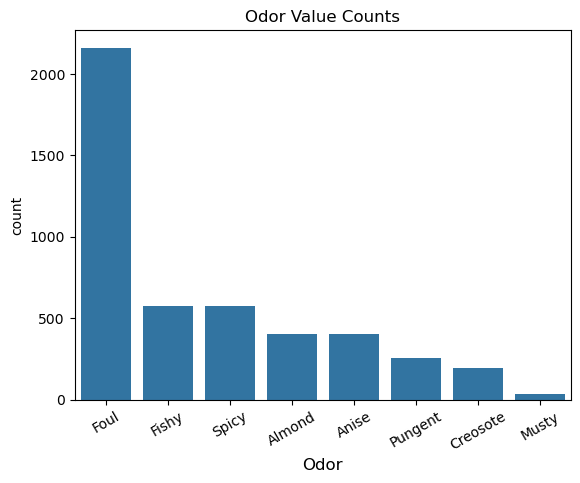

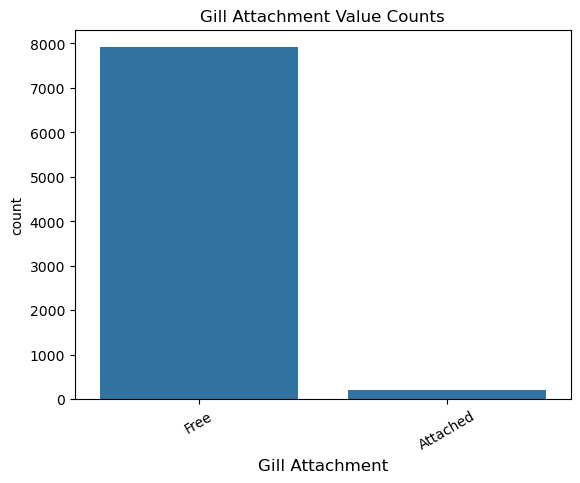

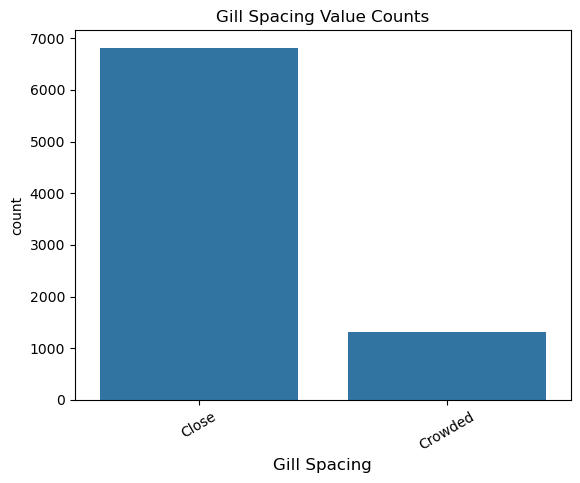

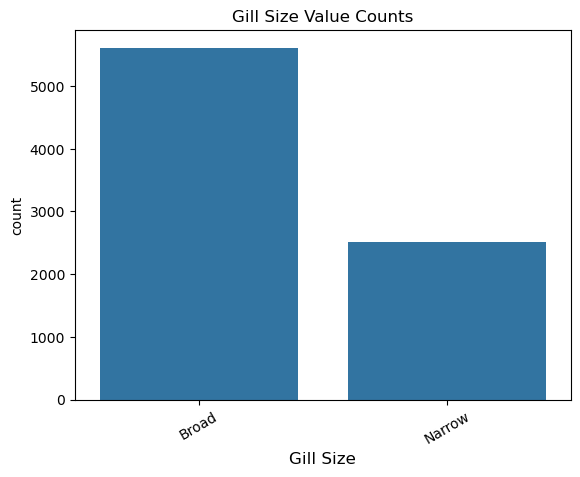

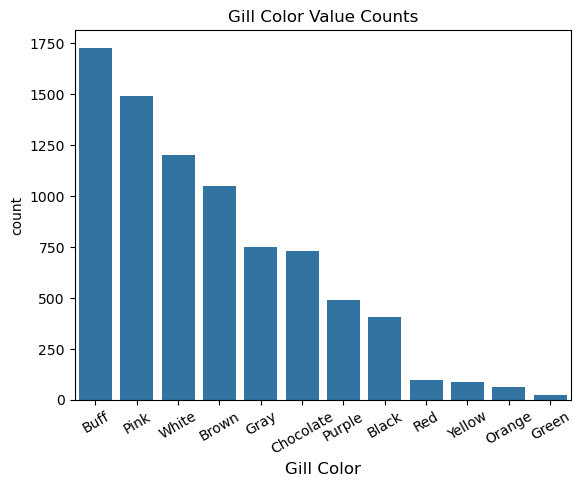

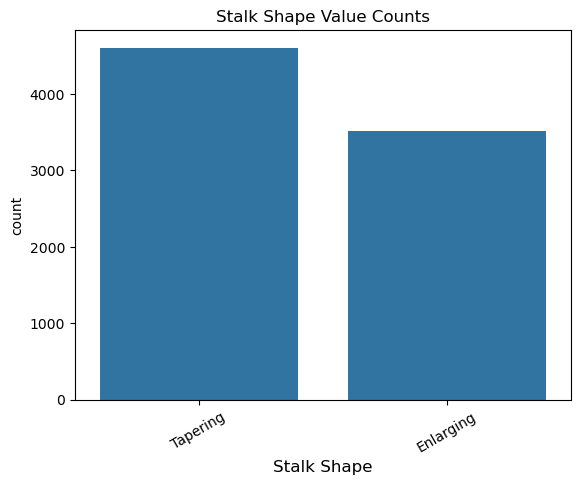

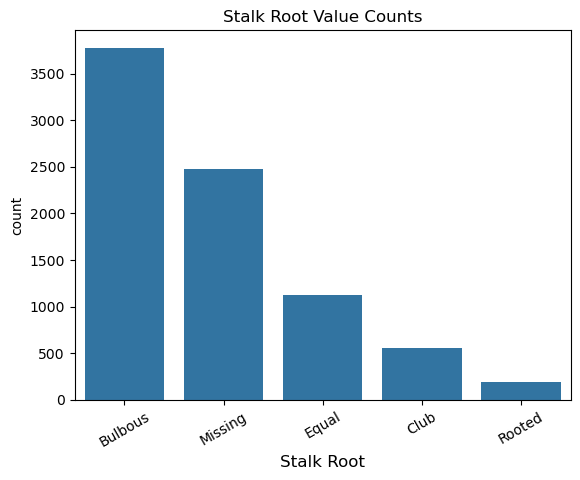

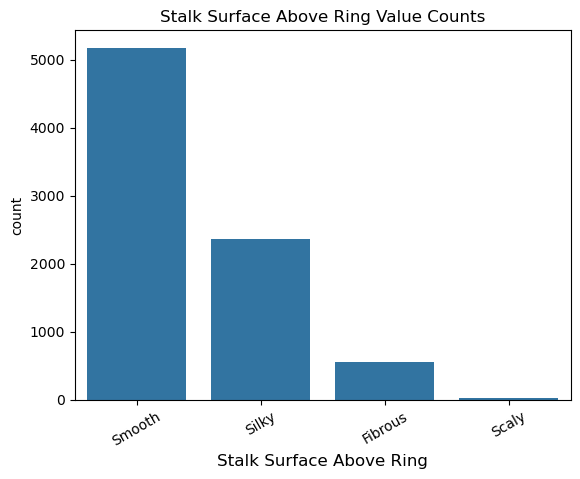

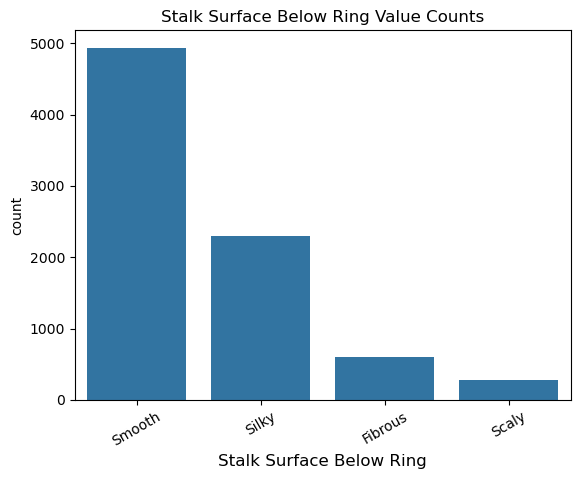

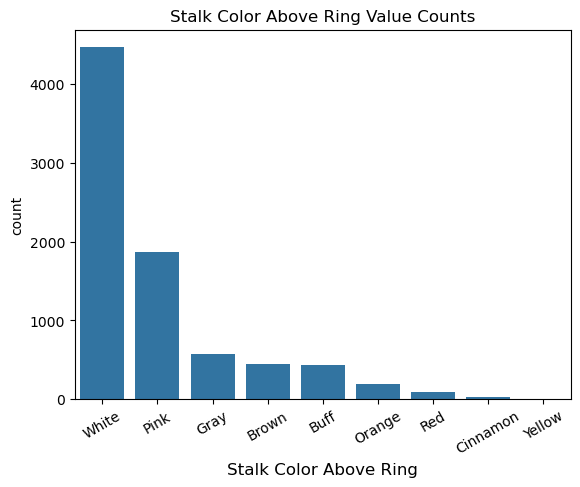

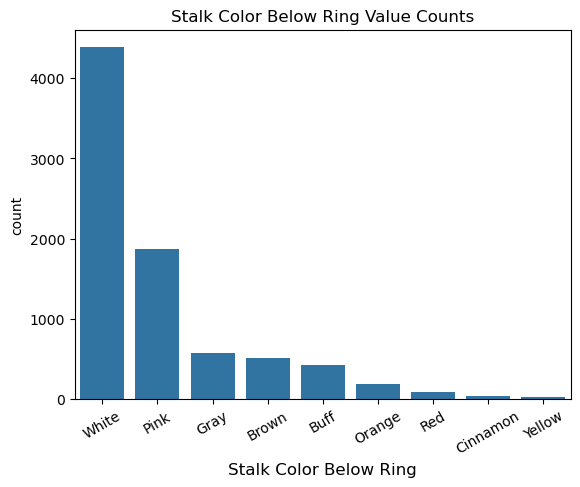

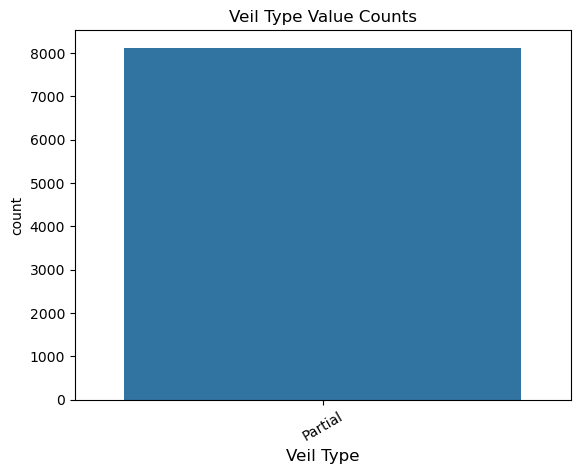

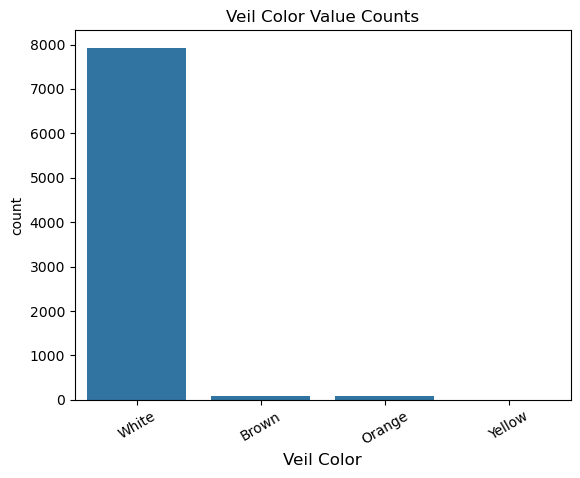

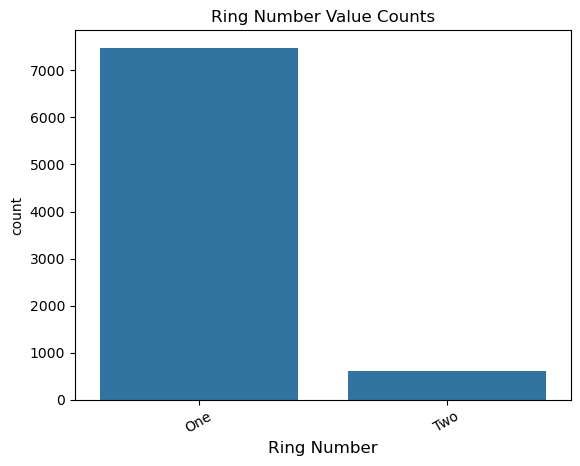

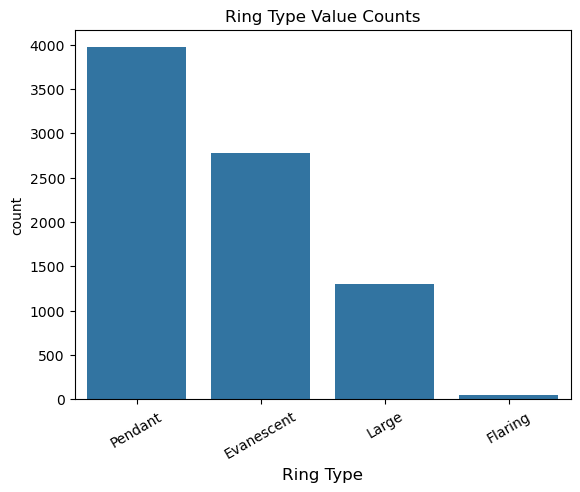

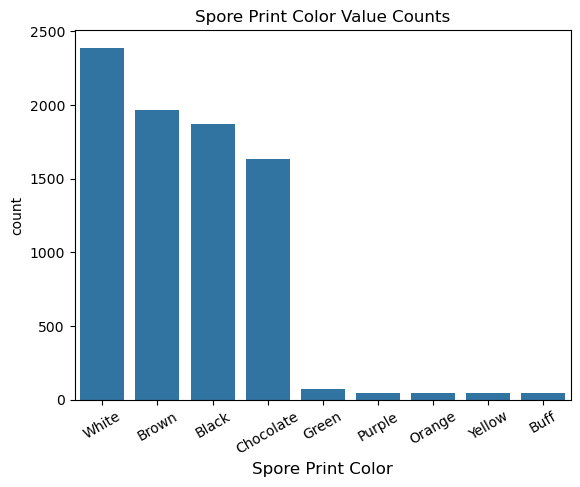

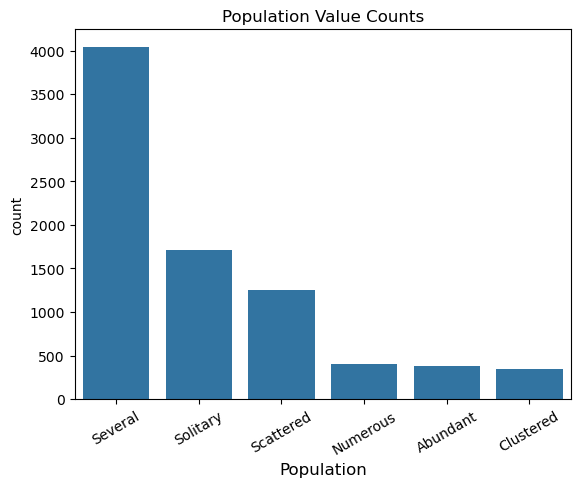

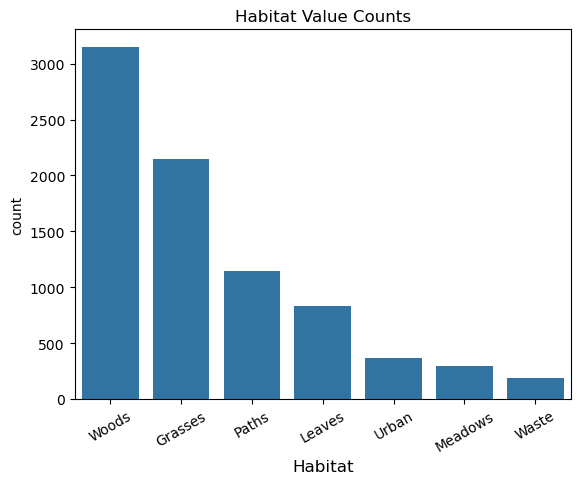

<Figure size 640x480 with 0 Axes>

In [20]:
for column in columns:
    # print(column)
    sns.countplot(x = df[column], data=df, order=df[column].value_counts().index)
    # rotates the value labels slightly so they don't overlap, also slightly increases font size
    plt.xticks(rotation=30, fontsize=10)
    # increases the variable label font size slightly to increase readability
    plt.xlabel(column, fontsize=12)
    plt.title(column + ' Value Counts')
    plt.show()
    plt.clf()

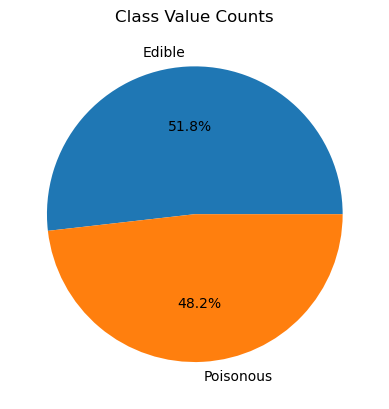

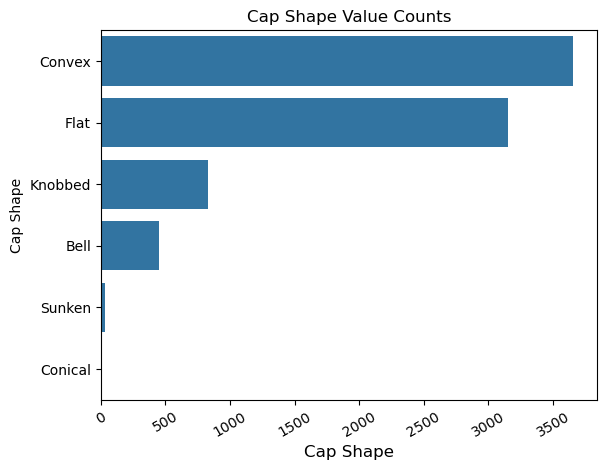

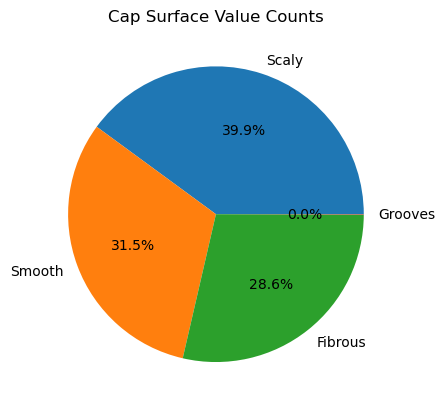

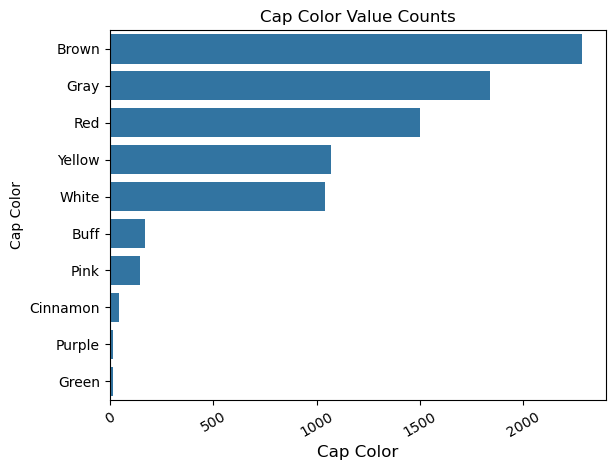

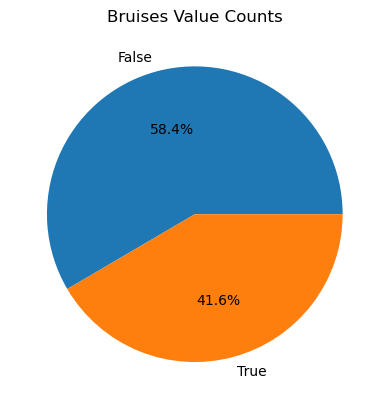

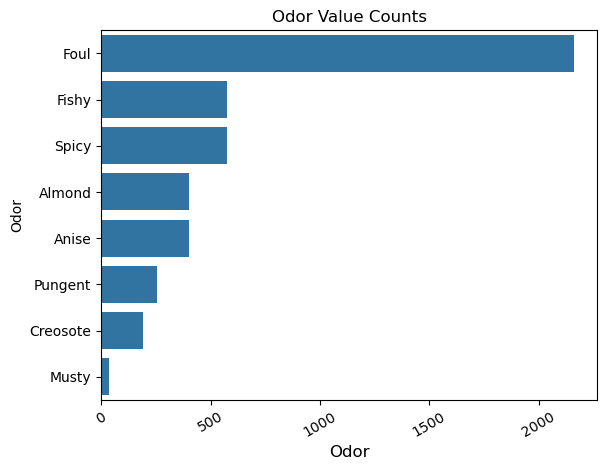

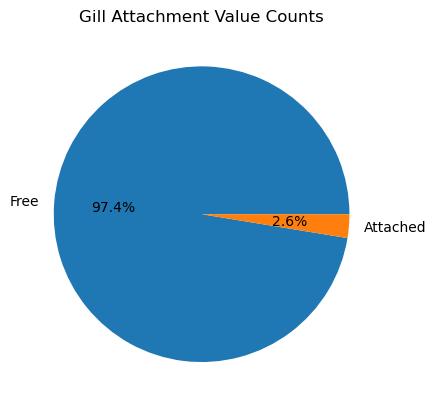

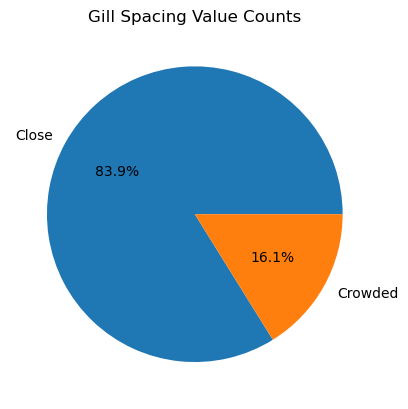

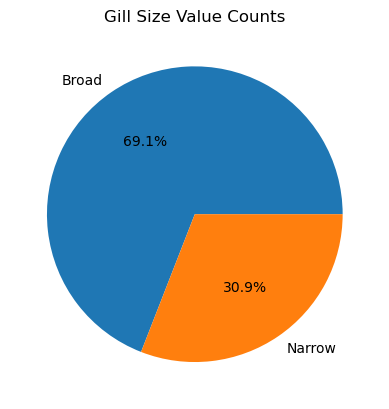

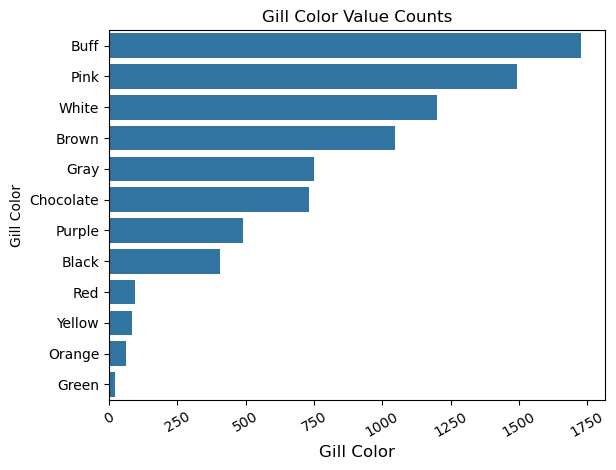

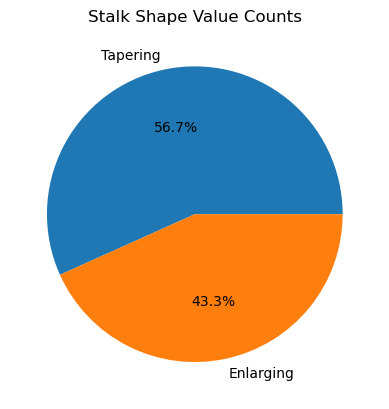

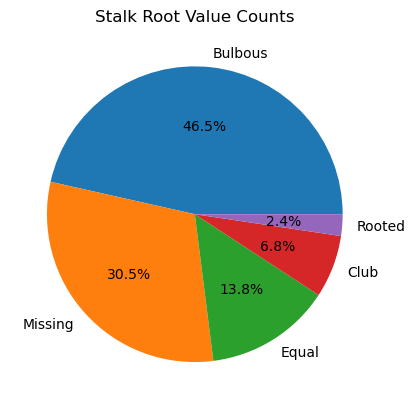

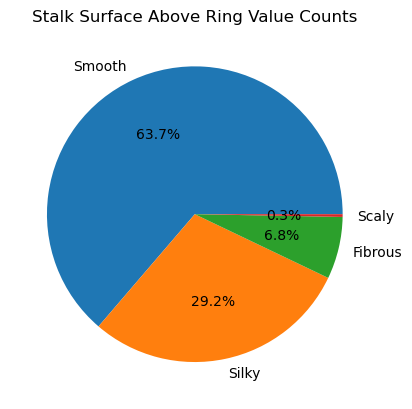

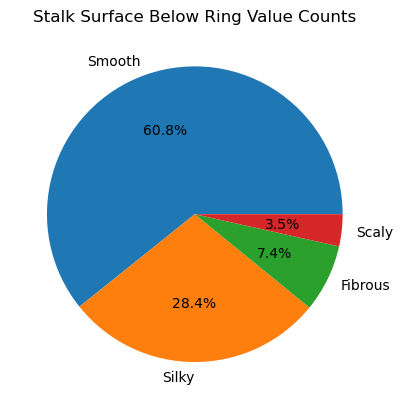

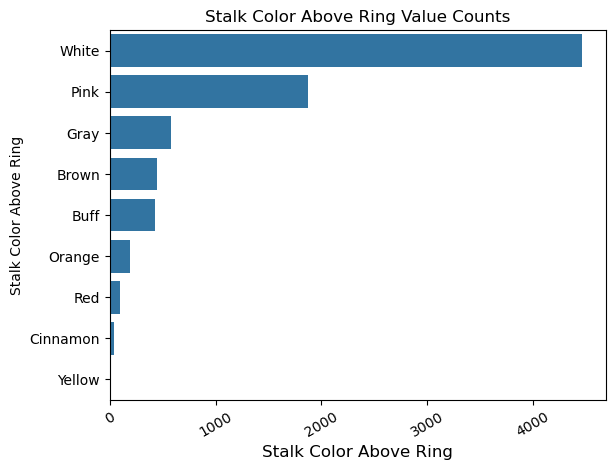

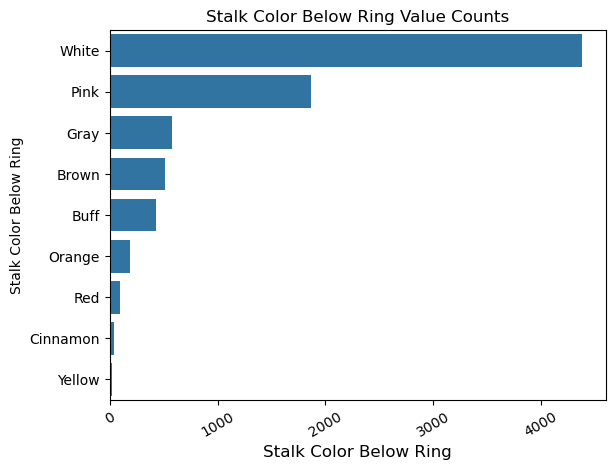

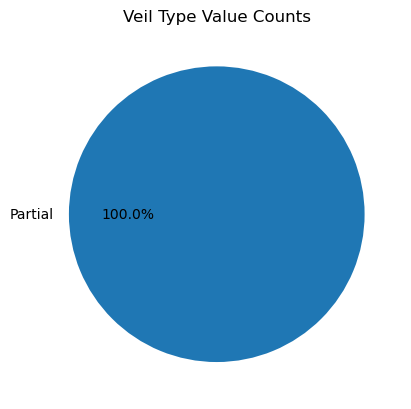

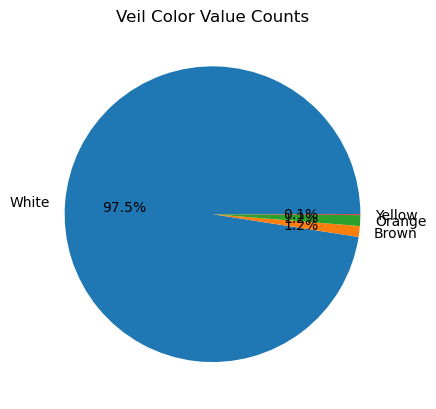

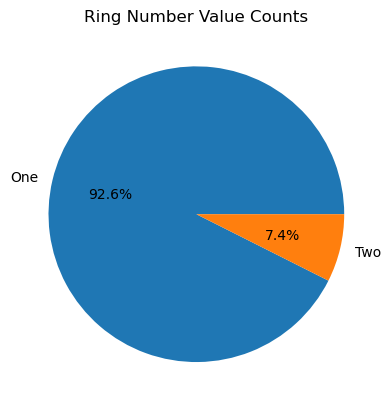

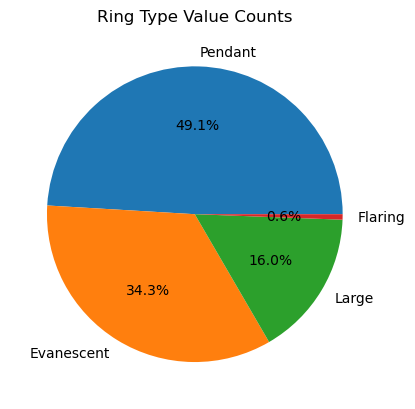

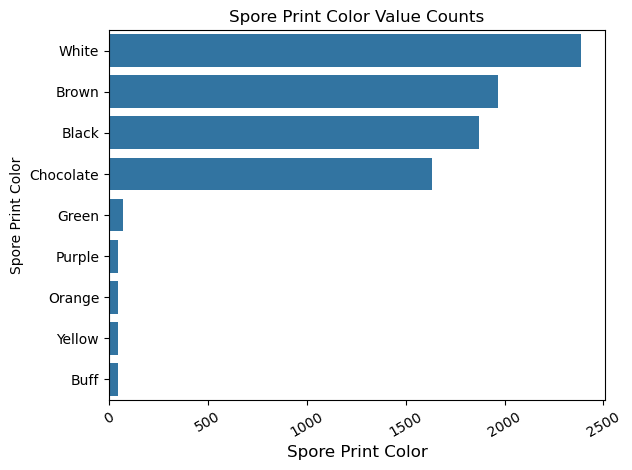

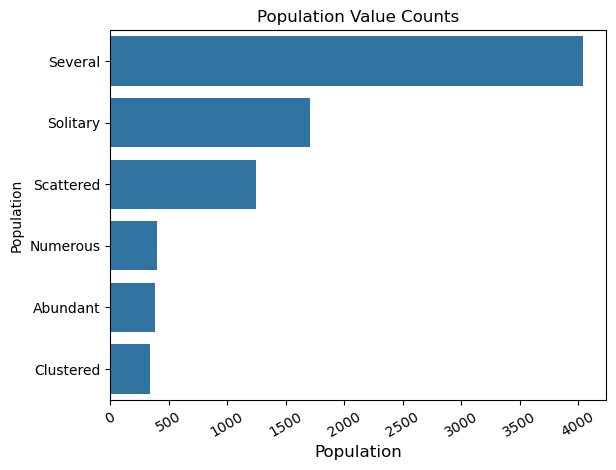

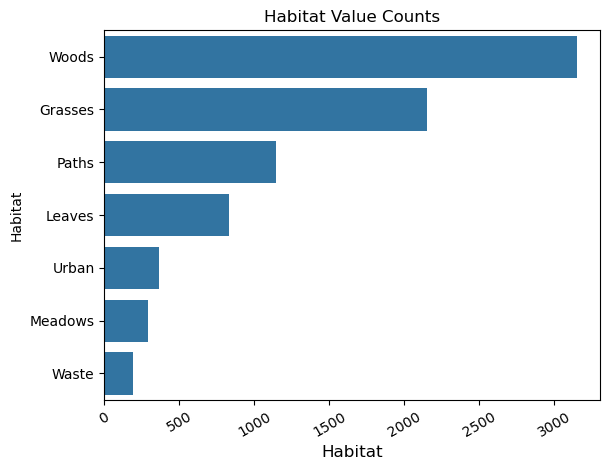

<Figure size 640x480 with 0 Axes>

In [24]:
for column in df.columns:
    value_counts = df[column].value_counts()
    if len(value_counts) < 6:
        # Create a pie chart
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
        plt.title(column + " Value Counts")
    else:
        # Create a bar chart in descending order
        sns.countplot(df[column], order=value_counts.index)
        plt.title(column + " Value Counts")
        plt.xticks(rotation=30, fontsize=10)
        plt.xlabel(column, fontsize=12)
    
    plt.show()
    plt.clf()
